In [1]:
import pandas as pd

In [2]:
accident=pd.read_csv('Accident_Information.csv',low_memory=False, chunksize=30000)

In [3]:
vehicle=pd.read_csv('Vehicle_Information.csv',low_memory=False, chunksize=30000)

In [4]:
#chunk cleaning and dataframing for accident column
accidentchunk = []
for chunk in accident:
    accidentchunk_filter = chunk[
        (chunk.Year.astype(int) >= 2005) &
        (chunk.Year.astype(int) <= 2016) &
        (chunk['Road_Type'] != "Unknown") &
        (chunk['Junction_Control'] != "Data missing or out of range") &
        (chunk['Carriageway_Hazards'] != "Data missing or out of range") &
        (chunk['Junction_Detail'] != "Data missing or out of range") &
        (chunk['Road_Surface_Conditions'] != "Data missing or out of range") &
        (chunk['Special_Conditions_at_Site'] != "Data missing or out of range") &
        (chunk['Weather_Conditions'] != "Data missing or out of range") &
        (chunk['Latitude'].notnull()) &
        (chunk['Longitude'].notnull())
    ]
    accidentchunk.append(accidentchunk_filter)
df1 = pd.concat(accidentchunk)

In [5]:
#chunk cleaning for vehicles column
vehiclechunk = []
for chunk2 in vehicle:
    vehiclechunk_filter = chunk2[
        (chunk2.Year.astype(int) >= 2005)&
        (chunk2.Year.astype(int) <= 2016) &
        (chunk2['Driver_Home_Area_Type'] != "Data missing or out of range") &
        (chunk2['Journey_Purpose_of_Driver'] != "Data missing or out of range") &
        (chunk2['Junction_Location'] != "Data missing or out of range") &
        (chunk2['Was_Vehicle_Left_Hand_Drive'] != "Data missing or out of range") &
        (chunk2['Hit_Object_in_Carriageway'] != "Data missing or out of range") &
        (chunk2['Skidding_and_Overturning'] != "Data missing or out of range") &
        (chunk2['Towing_and_Articulation'] != "Data missing or out of range") &
        (chunk2['Vehicle_Leaving_Carriageway'] != "Data missing or out of range") &
        (chunk2['Vehicle_Manoeuvre'] != "Data missing or out of range") &
        (chunk2['Vehicle_Type'] != "Data missing or out of range") &
        (chunk2['X1st_Point_of_Impact'] != "Data missing or out of range") &
        (chunk2['Sex_of_Driver'] != "Data missing or out of range") &
        (chunk2['Age_Band_of_Driver'] != "Data missing or out of range")
        
    ]
    vehiclechunk.append(vehiclechunk_filter)
df2 = pd.concat(vehiclechunk)

In [6]:
#check columns
print("Accident's Columns:\n",df1.columns, "\n")

print("Vehicle's Columns:\n",df2.columns)

Accident's Columns:
 Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object') 

Vehicle's Columns:
 Index(['Accident_Index', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Driver_IMD_Decile', '

In [7]:
print('Accident Shape', df1.shape)
print('Vehicle Shape',df2.shape)

Accident Shape (1210667, 34)
Vehicle Shape (1696967, 24)


In [8]:
#merge dataframes
df = pd.merge(df1,df2)

In [9]:
#check columns
print("Names of Combined Columns:\n",df.columns, "\n")
print("\nShape:\n",df.shape)

Names of Combined Columns:
 Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.',
       'Hit_Object_in_Carriageway', 'Hit

In [10]:
df.describe(include ='all')

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact
count,1075160,1075160,1.075160e+06,1009201,1.060112e+06,1075160,1075160,1075160,1075160,1.075139e+06,...,1075160,1075160,1075160,1075160,1.075147e+06,1075160,1.075160e+06,1075160,1075160,1075160
unique,775350,6,NaN,6,NaN,3,6,4383,7,NaN,...,3,6,6,9,NaN,18,NaN,20,2,5
top,2009559D05333,A,NaN,Unclassified,NaN,Slight,None,2015-05-13,Friday,NaN,...,Male,None,No tow/articulation,Did not leave carriageway,NaN,Going ahead other,NaN,Car,No,Front
freq,21,543047,NaN,678598,NaN,935411,1064669,515,178521,NaN,...,729725,972176,1062547,985309,NaN,471315,NaN,794148,1073855,525273
mean,NaN,NaN,1.048526e+03,NaN,6.010460e+02,NaN,NaN,NaN,NaN,1.151028e+00,...,NaN,NaN,NaN,NaN,8.498838e-02,NaN,1.513613e+00,NaN,NaN,NaN
std,NaN,NaN,1.828103e+03,NaN,1.589961e+03,NaN,NaN,NaN,NaN,3.619824e-01,...,NaN,NaN,NaN,NaN,7.761954e-01,NaN,6.595612e-01,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,1.000000e+00,...,NaN,NaN,NaN,NaN,0.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,1.000000e+00,...,NaN,NaN,NaN,NaN,0.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN
50%,NaN,NaN,1.860000e+02,NaN,0.000000e+00,NaN,NaN,NaN,NaN,1.000000e+00,...,NaN,NaN,NaN,NaN,0.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN
75%,NaN,NaN,8.160000e+02,NaN,1.580000e+02,NaN,NaN,NaN,NaN,1.000000e+00,...,NaN,NaN,NaN,NaN,0.000000e+00,NaN,2.000000e+00,NaN,NaN,NaN


In [11]:
#check corr b/t Location_Easting_OSGR & Location_Northing_OSGR AND Longitude and Latitude

print(df['Location_Easting_OSGR'].corr(df['Longitude']))


print(df['Location_Northing_OSGR'].corr(df['Latitude']))

0.9994280892528802
0.999973244937995


In [12]:
#drop Location_Easting_OSGR & Location_Northing_OSGR
#because they are the similar to Latitude and Longitude 

df = df.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR'], axis=1)

In [13]:
df.shape

(1075160, 54)

In [14]:
#standardize all column names to lowercase, and remove some characters 
#for ease of use in querying
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace('.','')
df.columns = df.columns.str.replace('(','')
df.columns = df.columns.str.replace(')','')

C:\Users\Shridatta\AppData\Local\Temp\ipykernel_6296\2831236610.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.','')
C:\Users\Shridatta\AppData\Local\Temp\ipykernel_6296\2831236610.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('(','')
C:\Users\Shridatta\AppData\Local\Temp\ipykernel_6296\2831236610.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(')','')


In [15]:
#convert date/time to datetime datatype

df['date'] = pd.to_datetime((df['date']), format= "%Y-%m-%d")

In [16]:
df.dtypes

accident_index                                         object
1st_road_class                                         object
1st_road_number                                       float64
2nd_road_class                                         object
2nd_road_number                                       float64
accident_severity                                      object
carriageway_hazards                                    object
date                                           datetime64[ns]
day_of_week                                            object
did_police_officer_attend_scene_of_accident           float64
junction_control                                       object
junction_detail                                        object
latitude                                              float64
light_conditions                                       object
local_authority_district                               object
local_authority_highway                                object
longitud

In [17]:
#mistyped datatypes

df[['did_police_officer_attend_scene_of_accident',
    'driver_imd_decile','vehicle_reference',
    'vehicle_locationrestricted_lane','1st_road_number',
    '2nd_road_number','driver_imd_decile',
    'pedestrian_crossing-physical_facilities',
   'pedestrian_crossing-human_control']]= df[['did_police_officer_attend_scene_of_accident',
    'driver_imd_decile','vehicle_reference',
    'vehicle_locationrestricted_lane','1st_road_number',
    '2nd_road_number','driver_imd_decile',
    'pedestrian_crossing-physical_facilities',
   'pedestrian_crossing-human_control']].astype('object')

In [18]:
df.columns.to_series().groupby(df.dtypes).groups

{datetime64[ns]: ['date'], int64: ['number_of_casualties', 'number_of_vehicles', 'year'], float64: ['latitude', 'longitude', 'speed_limit', 'age_of_vehicle', 'engine_capacity_cc'], object: ['accident_index', '1st_road_class', '1st_road_number', '2nd_road_class', '2nd_road_number', 'accident_severity', 'carriageway_hazards', 'day_of_week', 'did_police_officer_attend_scene_of_accident', 'junction_control', 'junction_detail', 'light_conditions', 'local_authority_district', 'local_authority_highway', 'lsoa_of_accident_location', 'pedestrian_crossing-human_control', 'pedestrian_crossing-physical_facilities', 'police_force', 'road_surface_conditions', 'road_type', 'special_conditions_at_site', 'time', 'urban_or_rural_area', 'weather_conditions', 'inscotland', 'age_band_of_driver', 'driver_home_area_type', 'driver_imd_decile', 'hit_object_in_carriageway', 'hit_object_off_carriageway', 'journey_purpose_of_driver', 'junction_location', 'make', 'model', 'propulsion_code', 'sex_of_driver', 'skidd

In [19]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

driver_imd_decile                              20.398266
age_of_vehicle                                 14.595967
model                                          12.604264
engine_capacity_cc                             10.274657
propulsion_code                                 9.500725
2nd_road_class                                  6.134808
lsoa_of_accident_location                       5.848060
make                                            3.916719
2nd_road_number                                 1.399606
time                                            0.006325
pedestrian_crossing-physical_facilities         0.004929
pedestrian_crossing-human_control               0.003720
did_police_officer_attend_scene_of_accident     0.001953
speed_limit                                     0.001209
vehicle_locationrestricted_lane                 0.001209
was_vehicle_left_hand_drive                     0.000000
driver_home_area_type                           0.000000
vehicle_type                   

In [20]:
df.shape

(1075160, 54)

In [21]:
# #2nd_road_class
df['2nd_road_class'].value_counts()/df.shape[0]*100

Unclassified    63.116001
A               15.575821
C                7.420849
B                6.329756
Motorway         1.283995
A(M)             0.138770
Name: 2nd_road_class, dtype: float64

With 63% of non null being unclassified, so decided to drop entire column.

In [22]:
df = df.drop(['2nd_road_class'], axis=1)

In [23]:
df.shape

(1075160, 53)

In [24]:
#driver_imd_decile
df['driver_imd_decile'].value_counts()/df.shape[0]*100

2.0     8.740839
3.0     8.640202
4.0     8.375126
1.0     8.285557
5.0     8.164366
6.0     8.061498
7.0     7.772518
8.0     7.513114
9.0     7.338815
10.0    6.709699
Name: driver_imd_decile, dtype: float64

Since the distribution of categories for 'driver_imd_decile seem very similar, I've decided not to use the mode but "method='ffill'"

In [25]:
df['driver_imd_decile'].fillna(method='ffill', inplace=True)

In [26]:
df['age_of_vehicle'].describe()

count    918230.000000
mean          7.114115
std           4.709709
min           1.000000
25%           3.000000
50%           7.000000
75%          10.000000
max         105.000000
Name: age_of_vehicle, dtype: float64

In [27]:
df['age_of_vehicle'].median()

7.0

In [28]:
#fillna by 7 
df['age_of_vehicle'].fillna(7, inplace=True)

In [29]:
df.shape

(1075160, 53)

In [30]:
#model
df['model'].value_counts()/df.shape[0]*100

MISSING                           0.497879
CLIO DYNAMIQUE 16V                0.353901
PUNTO ACTIVE                      0.258008
KA                                0.225548
206 LX                            0.207411
                                    ...   
420D XDRIVE LUXURY AUTO           0.000093
JETTA LX                          0.000093
RS5 LIMITED EDIT FSI QUATTR       0.000093
NOTE ACENTA PREMIUM SAFE DIG-S    0.000093
TREKKER ROAD                      0.000093
Name: model, Length: 31348, dtype: float64

In [31]:
df['model'].describe()

count      939644
unique      31348
top       MISSING
freq         5353
Name: model, dtype: object

In [32]:
df['model'].fillna(method='ffill', inplace=True)

Note: A lot of the values of "model' are labeled as "missing". I do not want to change these because the model could have actually been missing from the car from the accident or it could not be recognizable at the time of the accident.

In [33]:
#engine_capacity_cc
df['engine_capacity_cc'].describe()

count    964691.000000
mean       1928.804717
std        1746.934017
min           1.000000
25%        1248.000000
50%        1598.000000
75%        1995.000000
max       91000.000000
Name: engine_capacity_cc, dtype: float64

In [34]:
import numpy as np
#first I'm going to handle both ends of outliers.
#(determine the min and max cuttoffs for detecting the outlier)
q75, q25 = np.percentile(df['engine_capacity_cc'].dropna(), [75 ,25])
iqr = q75 - q25
 
ecmin = q25 - (iqr*1.5)
ecmax = q75 + (iqr*1.5)

print(ecmax)
print(ecmin)

3115.5
127.5


Using the ecmax number for the maximum engine_capacity_cc and ecmin for my engine_capacity_cc. Then going to take the mean of those and use it as my fillna. And also ouliers are removed from the data.

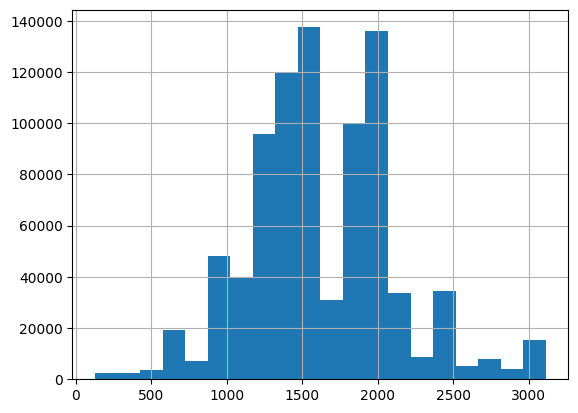

In [35]:
import matplotlib.pyplot as plt
df = df[df['engine_capacity_cc']<=ecmax]
df = df[df['engine_capacity_cc']>=ecmin]
df['engine_capacity_cc'].hist(bins=20)
plt.style.use('dark_background')

In [36]:
#check values of 'engine_capacity_cc'
df['engine_capacity_cc'].describe()

count    852559.000000
mean       1637.052930
std         484.345154
min         128.000000
25%        1299.000000
50%        1598.000000
75%        1984.000000
max        3113.000000
Name: engine_capacity_cc, dtype: float64

In [37]:
df['engine_capacity_cc'].fillna(1637, inplace=True)

Note: After doing the above null fixes, propulsion_code dropped from having 10% null values to 0. (see below). And continue on fixing the lsoa_of_accident_location then drop the rest of the null values with are all <5%.

In [38]:
df.shape

(852559, 53)

In [39]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

lsoa_of_accident_location                      5.979176
2nd_road_number                                1.420664
make                                           0.042109
time                                           0.005630
pedestrian_crossing-physical_facilities        0.004223
pedestrian_crossing-human_control              0.003871
did_police_officer_attend_scene_of_accident    0.001994
vehicle_locationrestricted_lane                0.001173
speed_limit                                    0.000821
propulsion_code                                0.000117
driver_home_area_type                          0.000000
driver_imd_decile                              0.000000
journey_purpose_of_driver                      0.000000
engine_capacity_cc                             0.000000
hit_object_in_carriageway                      0.000000
hit_object_off_carriageway                     0.000000
age_of_vehicle                                 0.000000
model                                          0

In [40]:
# #lsoa_of_accident_location
df['lsoa_of_accident_location'].value_counts()

E01000004    789
E01004736    570
E01018648    545
E01023722    453
E01032739    440
            ... 
E01015803      1
E01025102      1
E01006019      1
E01016244      1
E01010581      1
Name: lsoa_of_accident_location, Length: 34842, dtype: int64

In [41]:
df['lsoa_of_accident_location'].describe()

count        801583
unique        34842
top       E01000004
freq            789
Name: lsoa_of_accident_location, dtype: object

In [42]:
df['lsoa_of_accident_location'].fillna(method='ffill', inplace=True)

In [43]:
#### Check nulls for again
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

2nd_road_number                                1.420664
make                                           0.042109
time                                           0.005630
pedestrian_crossing-physical_facilities        0.004223
pedestrian_crossing-human_control              0.003871
did_police_officer_attend_scene_of_accident    0.001994
vehicle_locationrestricted_lane                0.001173
speed_limit                                    0.000821
propulsion_code                                0.000117
driver_home_area_type                          0.000000
journey_purpose_of_driver                      0.000000
driver_imd_decile                              0.000000
engine_capacity_cc                             0.000000
hit_object_in_carriageway                      0.000000
age_of_vehicle                                 0.000000
age_band_of_driver                             0.000000
hit_object_off_carriageway                     0.000000
model                                          0

In [44]:
df.shape

(852559, 53)

In [45]:
#drop the remaining nulls that are <1%
df.dropna(inplace=True)

#last check
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

accident_index                                 0.0
urban_or_rural_area                            0.0
year                                           0.0
inscotland                                     0.0
age_band_of_driver                             0.0
age_of_vehicle                                 0.0
driver_home_area_type                          0.0
driver_imd_decile                              0.0
engine_capacity_cc                             0.0
hit_object_in_carriageway                      0.0
hit_object_off_carriageway                     0.0
journey_purpose_of_driver                      0.0
junction_location                              0.0
make                                           0.0
model                                          0.0
propulsion_code                                0.0
sex_of_driver                                  0.0
skidding_and_overturning                       0.0
towing_and_articulation                        0.0
vehicle_leaving_carriageway    

In [46]:
df.shape

(839971, 53)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839971 entries, 1 to 1075159
Data columns (total 53 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   accident_index                               839971 non-null  object        
 1   1st_road_class                               839971 non-null  object        
 2   1st_road_number                              839971 non-null  object        
 3   2nd_road_number                              839971 non-null  object        
 4   accident_severity                            839971 non-null  object        
 5   carriageway_hazards                          839971 non-null  object        
 6   date                                         839971 non-null  datetime64[ns]
 7   day_of_week                                  839971 non-null  object        
 8   did_police_officer_attend_scene_of_accident  839971 non-null  o

In [48]:
# #number_of_casualties
df['number_of_casualties'].value_counts()

1     584658
2     171992
3      53080
4      18733
5       7079
6       2675
7        928
8        371
9        209
10        88
11        47
12        40
13        24
16        12
15         7
14         5
17         4
21         4
18         3
19         2
22         2
24         2
29         2
42         2
41         1
43         1
Name: number_of_casualties, dtype: int64

In [49]:
#create casualities grouping

def casualities(num_cas):
    if num_cas >=1 and num_cas <2:
        return "1"
    elif num_cas >=2 and num_cas <3:
        return "2"
    elif num_cas >=3 and num_cas <4:
        return "3"
    elif num_cas >= 4 and num_cas <5:
        return "4"
    elif num_cas >= 5:
        return "5+"
  

In [50]:
#apply function   
df['number_of_casuality_group']= df['number_of_casualties'].apply(casualities)

In [51]:
#number_of_casualties
df['number_of_casuality_group'].value_counts()

1     584658
2     171992
3      53080
4      18733
5+     11508
Name: number_of_casuality_group, dtype: int64

In [52]:
df['propulsion_code'].value_counts()/df.shape[0]*100

Petrol                 62.536564
Heavy oil              36.766388
Hybrid electric         0.565020
Gas/Bi-fuel             0.094289
Petrol/Gas (LPG)        0.025358
Electric diesel         0.008810
Gas                     0.002976
New fuel technology     0.000357
Fuel cells              0.000119
Gas Diesel              0.000119
Name: propulsion_code, dtype: float64

In [53]:
#Clean the values for Propulsion Code. 
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas", value="Petrol")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas/Bi-fuel", value="Bio-fuel")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Petrol/Gas (LPG)", value="LPG Petrol")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas Diesel", value="Diesel")

In [54]:
df['propulsion_code'].value_counts()/df.shape[0]*100

Petrol                 62.539540
Heavy oil              36.766388
Hybrid electric         0.565020
Bio-fuel                0.094289
LPG Petrol              0.025358
Electric diesel         0.008810
New fuel technology     0.000357
Fuel cells              0.000119
Diesel                  0.000119
Name: propulsion_code, dtype: float64

In [55]:
# #unique values
df.nunique().sort_values(ascending=False)

accident_index                                 646082
longitude                                      509807
latitude                                       492007
lsoa_of_accident_location                       34818
model                                           28344
2nd_road_number                                  6636
1st_road_number                                  5607
date                                             4383
time                                             1439
engine_capacity_cc                               1230
local_authority_district                          416
make                                              272
local_authority_highway                           207
age_of_vehicle                                     75
police_force                                       51
vehicle_reference                                  27
number_of_casualties                               26
vehicle_manoeuvre                                  18
number_of_vehicles          

In [56]:
df['date'] = pd.to_datetime(df['date'])

In [57]:
df['month'] = df ['date'].apply(lambda time: time.month)

In [58]:
#creating a weekend feature that includes Friday-Sunday
df['weekend']= np.where(df['day_of_week'].isin(['Friday', 'Saturday', 'Sunday']), "Weekend", "Weekday")

In [59]:
#create time of day feature with Morning Rush, Day, Noon Rush, Afternoon, After Work Rush, Night

#time of day dictionary
timeofdaygroups = {1: "Morning Rush (6-10)",
                   2: "Day (10-12)",
                   3: "Lunch Rush (12-14)",
                   4: "Afternoon (14-16)",
                   5: "After Work Rush (16-18)",
                   6: "Evening (18-22)",
                   7: "Night (22-6)"}

In [60]:
#pull time data and create hour column
df['hour'] = df['time'].str[0:2]
 
#convert to numeric    
df['hour'] =  pd.to_numeric(df['hour'])

#convert to integer
df['hour'] = df['hour'].astype('int')

In [61]:
#create time_of_day grouping

def daygroup(hour):
    if hour >= 6 and hour < 10:
        return "Morning (6-10)"
    elif hour >= 10 and hour < 12:
        return "Day (10-12)"
    elif hour >= 12 and hour < 14:
        return "Lunch (12-14)"
    elif hour >= 14 and hour < 16:
        return "Afternoon (14-16)"
    elif hour >= 16 and hour < 18:
        return "After Work (16-18)"
    elif hour >= 18 and hour < 22:
        return "Evening (18-22)"
    else:
        return "Night (22-6)"

In [62]:
#apply function   
#time of day function
df['time_of_day']= df['hour'].apply(daygroup)  

In [63]:
df[['weekend','day_of_week','time', 'time_of_day']].tail(10)

,weekend,day_of_week,time,time_of_day
1075150,Weekday,Wednesday,08:45,Morning (6-10)
1075151,Weekday,Wednesday,08:45,Morning (6-10)
1075152,Weekday,Tuesday,18:12,Evening (18-22)
1075153,Weekend,Sunday,11:00,Day (10-12)
1075154,Weekend,Sunday,11:00,Day (10-12)
1075155,Weekday,Monday,16:32,After Work (16-18)
1075156,Weekday,Monday,16:32,After Work (16-18)
1075157,Weekend,Friday,06:45,Morning (6-10)
1075158,Weekday,Tuesday,16:45,After Work (16-18)
1075159,Weekday,Tuesday,16:45,After Work (16-18)


In [64]:
#vehicle_type
df['vehicle_type'].value_counts()/df.shape[0]*100

Car                                      85.485451
Van / Goods 3.5 tonnes mgw or under       5.413163
Motorcycle over 500cc                     4.515632
Taxi/Private hire car                     2.861527
Motorcycle over 125cc and up to 500cc     1.043846
Motorcycle 125cc and under                0.166077
Minibus (8 - 16 passenger seats)          0.146553
Other vehicle                             0.137981
Goods over 3.5t. and under 7.5t           0.086670
Bus or coach (17 or more pass seats)      0.057502
Motorcycle 50cc and under                 0.041668
Goods 7.5 tonnes mgw and over             0.017143
Goods vehicle - unknown weight            0.010238
Motorcycle - unknown cc                   0.008691
Agricultural vehicle                      0.007024
Electric motorcycle                       0.000833
Name: vehicle_type, dtype: float64

In [65]:
#motorcycles
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle over 500cc", 
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace=
                                                        "Motorcycle over 125cc and up to 500cc",
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle 125cc and under", 
                                                value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle 50cc and under", 
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Electric motorcycle", 
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle - unknown cc", 
                                                        value="Motorcycle")


#Goods_vehicle
df['vehicle_type'] = df['vehicle_type'].replace(to_replace=
                                                        "Van / Goods 3.5 tonnes mgw or under", 
                                                        value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods over 3.5t. and under 7.5t", 
                                                        value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods vehicle - unknown weight", 
                                                        value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods 7.5 tonnes mgw and over", 
                                                        value="Goods Vehicle")

#car
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Taxi/Private hire car", 
                                                        value="Car")


#bus
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Minibus (8 - 16 passenger seats)", 
                                                        value="Bus")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace=
                                                        "Bus or coach (17 or more pass seats)", 
                                                        value="Bus")

#other vehicle
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Agricultural vehicle", 
                                                        value="Other Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Other vehicle", 
                                                        value="Other Vehicle")

In [66]:
#vehicle_type
df['vehicle_type'].value_counts()/df.shape[0]*100

Car              88.346979
Motorcycle        5.776747
Goods Vehicle     5.527215
Bus               0.204055
Other Vehicle     0.145005
Name: vehicle_type, dtype: float64

In [67]:
## Create more condense groups for age band of driver in order to deal with some potential outliers.
#age_band_of_driver 
df['age_band_of_driver'].value_counts()/df.shape[0]*100


26 - 35    22.464228
36 - 45    21.572173
46 - 55    17.067613
21 - 25    12.072322
56 - 65    10.280474
16 - 20     7.720981
66 - 75     5.325422
Over 75     3.481906
11 - 15     0.014286
6 - 10      0.000476
0 - 5       0.000119
Name: age_band_of_driver, dtype: float64

In [68]:
#I did this before hand because as "Over 75", it wouldnt convert in the codes below
df['age_band_of_driver']=df['age_band_of_driver'].replace("Over 75","75-100")

In [69]:
# age1 = ["0 - 5", "6 - 10", "11 - 15"]
# age2 = ["16 - 20","21 - 25"]
# age3 = ["26 - 35","36 - 45"]
# age4 = ["46 - 55", "56 - 65"]
# age5 = ["66 - 75", "75-100"]

In [70]:
# #over 75 wouldnt work in the string so I did it separately
# for (row, col) in df.iterrows():

#     if str.lower(col.age_band_of_driver) in age1:
#         df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, 
#                                          value='Under 16', inplace=True)

#     if str.lower(col.age_band_of_driver) in age2:
#         df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, 
#                                          value='16-25', inplace=True)
    
#     if str.lower(col.age_band_of_driver) in age3:
#         df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, 
#                                          value='26-45', inplace=True)
#     if str.lower(col.age_band_of_driver) in age4:
#         df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, 
#                                          value='46-65', inplace=True)
#     if str.lower(col.age_band_of_driver) in age5:
#         df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, 
#                                          value='Over 65', inplace=True)

In [71]:
#age_band_of_driver
print("Distinct responses for age_band_of_driver:\n", set(df['age_band_of_driver']))

Distinct responses for age_band_of_driver:
 {'75-100', '46 - 55', '36 - 45', '26 - 35', '0 - 5', '16 - 20', '56 - 65', '6 - 10', '11 - 15', '66 - 75', '21 - 25'}


In [72]:
# number_of_vehicles
df['number_of_vehicles'].value_counts()/df.shape[0]*100

2     72.057131
3     12.284234
1     11.846123
4      2.840931
5      0.635974
6      0.190245
7      0.075836
8      0.031549
9      0.012024
10     0.007500
11     0.007024
14     0.002381
32     0.002381
13     0.002262
12     0.001905
16     0.001786
20     0.000714
Name: number_of_vehicles, dtype: float64

In [73]:
#group number_of_vehicles

def vehicles(num_veh):
    if num_veh >=1 and num_veh <2:
        return "1"
    elif num_veh >=2 and num_veh <3:
        return "2"
    elif num_veh >=3 and num_veh <4:
        return "3"
    elif num_veh >= 4: 
        return "4+"
  
#apply function   
df['number_of_vehicles_group']= df['number_of_vehicles'].apply(vehicles)

In [74]:
# number_of_vehicles
df['number_of_vehicles_group'].value_counts()/df.shape[0]*100

2     72.057131
3     12.284234
1     11.846123
4+     3.812513
Name: number_of_vehicles_group, dtype: float64

In [75]:
df['number_of_vehicles_group'].dtypes

dtype('O')

In [76]:
df['number_of_vehicles_group']=df['number_of_vehicles_group'].astype('object')

In [77]:
#creating seasons column for ML

#creating season column

def getSeason(month):
    if (month == 12 or month == 1 or month == 2):
       return "winter"
    elif(month == 3 or month == 4 or month == 5):
       return "spring"
    elif(month == 6 or month== 7 or month == 8):
       return "summer"
    else:
       return "fall"

df['season'] = df['month'].apply(getSeason)

In [78]:
# number_of_vehicles
df['season'].value_counts()/df.shape[0]*100

fall      27.316419
summer    25.505642
spring    24.297744
winter    22.880195
Name: season, dtype: float64

<AxesSubplot: >

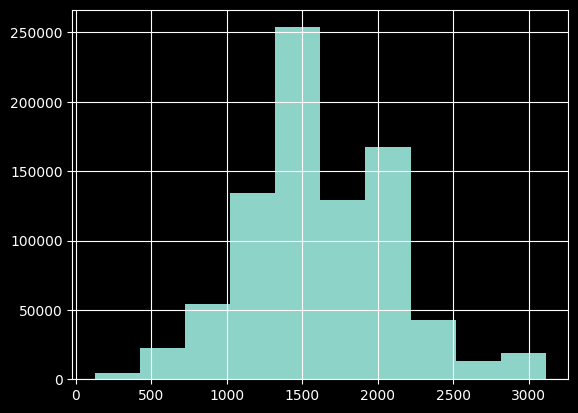

In [79]:
#go back to engine capacity CC and crete groups
df.engine_capacity_cc.hist()

In [80]:
def enginecap(eng_cc):
    if eng_cc <=1500:
        return "small engine cc"
    if eng_cc >1500 and eng_cc <=2000:
        return "medium engine cc"
    if eng_cc >2000:
        return "large engine cc"


df['engine_capacity_cc_group'] = df['engine_capacity_cc'].apply(enginecap)

In [81]:
df.engine_capacity_cc_group.value_counts()

medium engine cc    388380
small engine cc     343895
large engine cc     107696
Name: engine_capacity_cc_group, dtype: int64

In [82]:
#Put above pickle in next full run
#create new column for Machine Learning and Visualizations with Not Serious and Serious
df['accident_seriousness'] = df['accident_severity']
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Slight", 
                                                                value="Not Serious")
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Serious",
                                                                value="Serious")
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Fatal", 
                                                                value="Fatal")
df.shape

(839971, 62)

In [83]:
df.accident_seriousness.value_counts()

Not Serious    737239
Serious         95927
Fatal            6805
Name: accident_seriousness, dtype: int64

In [84]:
df.head()

,accident_index,1st_road_class,1st_road_number,2nd_road_number,accident_severity,carriageway_hazards,date,day_of_week,did_police_officer_attend_scene_of_accident,junction_control,...,x1st_point_of_impact,number_of_casuality_group,month,weekend,hour,time_of_day,number_of_vehicles_group,season,engine_capacity_cc_group,accident_seriousness
1,200501BS00012,A,4.0,325.0,Slight,None,2005-01-16,Sunday,1.0,Auto traffic signal,...,Front,1,1,Weekend,0,Night (22-6),1,winter,medium engine cc,Not Serious
2,200501BS00016,A,3217.0,3216.0,Slight,None,2005-01-18,Tuesday,1.0,Give way or uncontrolled,...,Front,1,1,Weekday,5,Night (22-6),2,winter,small engine cc,Not Serious
3,200501BS00016,A,3217.0,3216.0,Slight,None,2005-01-18,Tuesday,1.0,Give way or uncontrolled,...,Did not impact,1,1,Weekday,5,Night (22-6),2,winter,large engine cc,Not Serious
5,200501BS00020,A,3218.0,4.0,Slight,None,2005-01-21,Friday,1.0,Give way or uncontrolled,...,Offside,1,1,Weekend,9,Morning (6-10),2,winter,medium engine cc,Not Serious
6,200501BS00022,A,4.0,0.0,Serious,None,2005-01-08,Saturday,1.0,Give way or uncontrolled,...,Front,1,1,Weekend,3,Night (22-6),1,winter,medium engine cc,Serious


In [85]:
df.to_csv('Final_Acc_data.csv', index=False)

In [87]:
df['number_of_casualties'].groupby(df['accident_seriousness']).sum()

accident_seriousness
Fatal            13730
Not Serious    1064139
Serious         150853
Name: number_of_casualties, dtype: int64